# Trabajo semanal 8

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys
from IPython.display import display, Math

### TP5 - Ejercicio 2

### A)

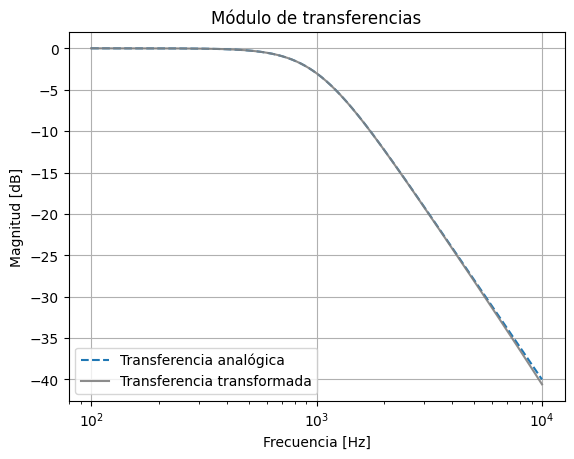

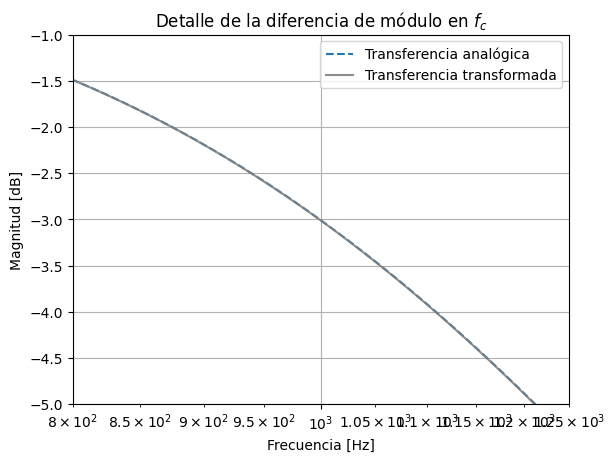

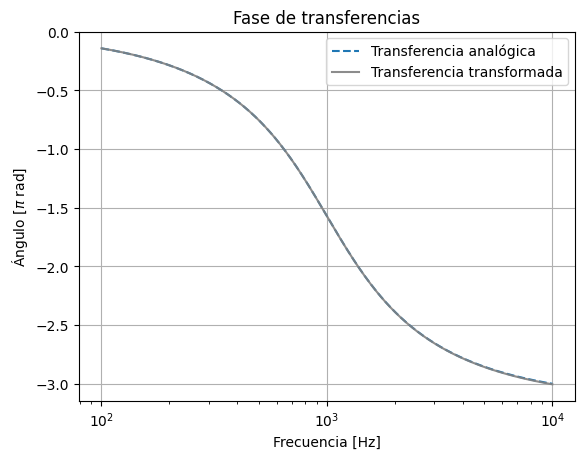

In [2]:
fs = 100e3
fc = 1e3

f = np.logspace(2,4,10**3)

#filtro butter pasabajo 2do orden, fc=1kHz
b,a = sig.butter(N=2,Wn=2*np.pi*fc,analog=True,output='ba')
w,h_s = sig.freqs(b,a,worN=f*2*np.pi)

#transformación bilineal
b,a = sig.bilinear(b,a,fs=fs)
w,h_z = sig.freqz(b,a,worN=f,fs=fs)

#gráfico de módulo en espectro completo
plt.figure(1)
plt.semilogx(f,20*np.log10(np.abs(h_s)),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,20*np.log10(np.abs(h_z)),label='Transferencia transformada',alpha=0.9,color='gray')
plt.grid(True)
plt.title('Módulo de transferencias')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()

#gráfico de detalle de módulo en fc
plt.figure(2)
plt.semilogx(f,20*np.log10(np.abs(h_s)),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,20*np.log10(np.abs(h_z)),label='Transferencia transformada',alpha=0.9,color='gray')
plt.ylim([-5,-1])
plt.xlim([10**np.log10(fc*0.8),10**np.log10(fc/0.8)])
plt.grid(True)
plt.title('Detalle de la diferencia de módulo en $f_c$')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()

#gráfico de fase en espectro completo
plt.figure(3)
plt.semilogx(f,np.angle(h_s),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,np.angle(h_z),label='Transferencia transformada',alpha=0.9,color='gray')
plt.grid(True)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [$\pi$ rad]')
plt.title('Fase de transferencias')

plt.legend()

### Conclusiones 2-a:

No se observan diferencias visibles entre ambas transferencias en módulo ni en fase, por lo que podemos considerar que no hay distorsión en la transformación de frecuencia. Esto se debe a que, al encontrarse la zona de interés del filtro lejos de la frecuencia digital máxima (por ser $f_c << f_s/2$), la transformación de frecuencia (de esta zona de interés) se encuentra en la región aproximadamente lineal de la función tangente. Podemos decir que la transferencia digital representa fielmente a la transferencia analógica.

## B)

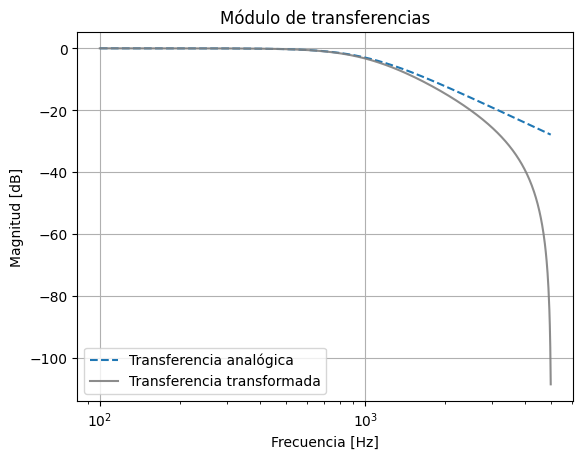

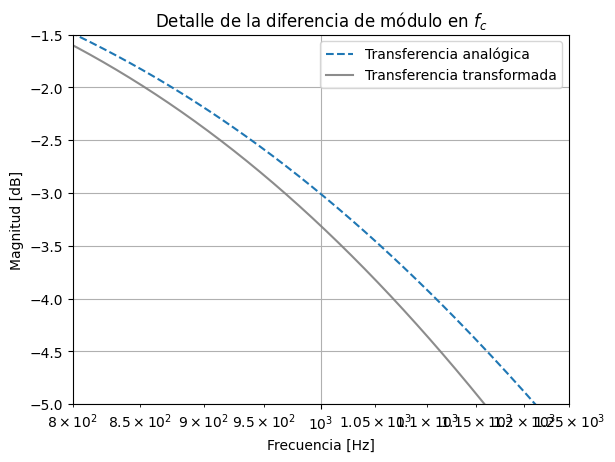

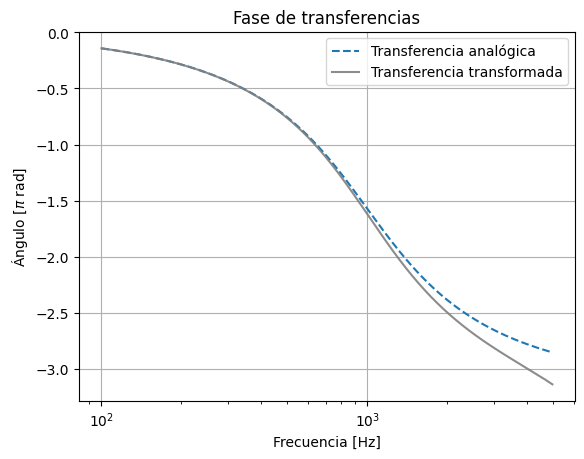

In [3]:
fs = 10e3
fc = 1e3

#reduzco el espectro hasta fs/2
f = np.logspace(2,np.log10(fs/2),10**3)
f = f[:-1] #remuevo el último elemento, en fs/2 h_z=0 y log10(h_z) tira error

#filtro butter pasabajo 2do orden, fc=1kHz
b,a = sig.butter(N=2,Wn=2*np.pi*fc,analog=True,output='ba')
w,h_s = sig.freqs(b,a,worN=f*2*np.pi)

#transformación bilineal
b,a = sig.bilinear(b,a,fs=fs)
w,h_z = sig.freqz(b,a,worN=f,fs=fs)

#gráfico de módulo en espectro completo
plt.figure(1)
plt.semilogx(f,20*np.log10(np.abs(h_s)),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,20*np.log10(np.abs(h_z)),label='Transferencia transformada',alpha=0.9,color='gray')
plt.grid(True)
plt.title('Módulo de transferencias')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()

#gráfico de detalle de módulo en fc
plt.figure(2)
plt.semilogx(f,20*np.log10(np.abs(h_s)),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,20*np.log10(np.abs(h_z)),label='Transferencia transformada',alpha=0.9,color='gray')
plt.ylim([-5,-1.5])
plt.xlim([10**np.log10(fc*0.8),10**np.log10(fc/0.8)])
plt.grid(True)
plt.title('Detalle de la diferencia de módulo en $f_c$')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()

#gráfico de fase en espectro completo
plt.figure(3)
plt.semilogx(f,np.angle(h_s),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,np.angle(h_z),label='Transferencia transformada',alpha=0.9,color='gray')
plt.grid(True)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [$\pi$ rad]')
plt.title('Fase de transferencias')

plt.legend()

In [4]:
# busco el primer índice superior o igual a la frecuencia de corte
fc_index = 0
while f[fc_index] <= fc:
    fc_index += 1
    
delta_t_s = 20*np.log10(np.abs(h_s[fc_index])) - 20*np.log10(np.abs(h_z[fc_index]))
delta_f_s = np.angle(h_s[fc_index]) - np.angle(h_z[fc_index])
display(Math(r'\text{Diferencia de módulo en } f_c = ' + str(delta_t_s)  + ' dB'))
display(Math(r'\text{Diferencia de fase en } f_c = ' + str(delta_f_s) + '\pi rad'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Conclusiones 2-b:

Al disminuir la frecuencia de muestreo, la frecuencia de corte (o región de interés de trabajo del filtro) se acercan a Nyquist (máxima frecuencia representable en dominio digital), por lo que empieza a resultar perceptible un error tanto en módulo como en fase, debido a la alinealidad de la función de transformación de transferencia (dada por una tangente, en este caso en una región cercana a $\pi$). La transferencia digital no representa fielmente a la transferencia analógica.

## C)

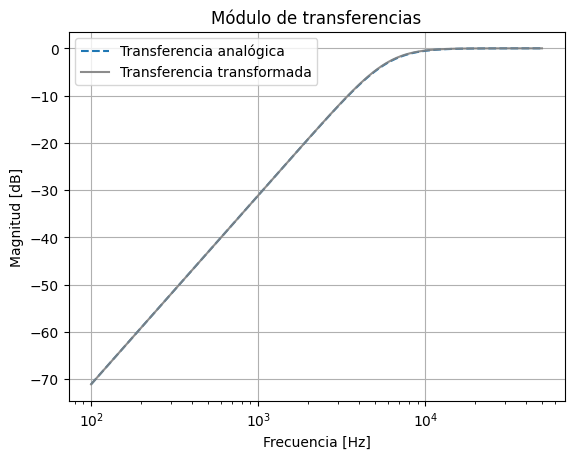

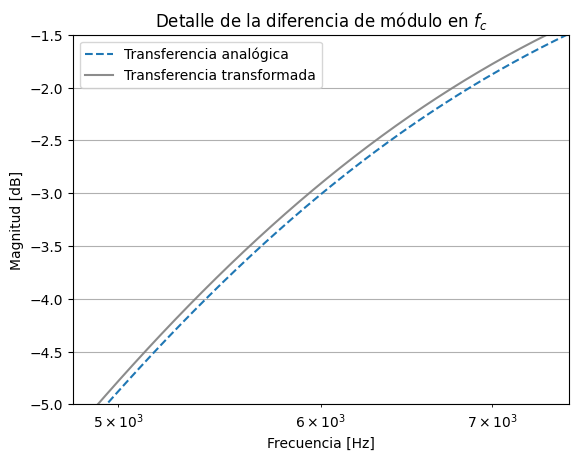

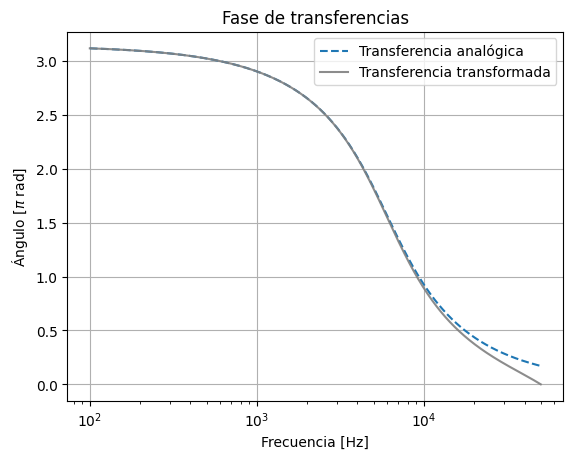

In [5]:
fs = 100e3
fc = 6e3

#reduzco el espectro hasta fs/2
f = np.logspace(2,np.log10(fs/2),10**3)

#filtro butter pasaalto 2do orden, fc=6kHz
b,a = sig.butter(N=2,Wn=2*np.pi*fc,analog=True,output='ba',btype='highpass')
w,h_s = sig.freqs(b,a,worN=f*2*np.pi)

#transformación bilineal
b,a = sig.bilinear(b,a,fs=fs)
w,h_z = sig.freqz(b,a,worN=f,fs=fs)

#gráfico de módulo en espectro completo
plt.figure(1)
plt.semilogx(f,20*np.log10(np.abs(h_s)),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,20*np.log10(np.abs(h_z)),label='Transferencia transformada',alpha=0.9,color='gray')
plt.grid(True)
plt.title('Módulo de transferencias')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()

#gráfico de detalle de módulo en fc
plt.figure(2)
plt.semilogx(f,20*np.log10(np.abs(h_s)),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,20*np.log10(np.abs(h_z)),label='Transferencia transformada',alpha=0.9,color='gray')
plt.ylim([-5,-1.5])
plt.xlim([10**np.log10(fc*0.8),10**np.log10(fc/0.8)])
plt.grid(True)
plt.title('Detalle de la diferencia de módulo en $f_c$')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.legend()

#gráfico de fase en espectro completo
plt.figure(3)
plt.semilogx(f,np.angle(h_s),label='Transferencia analógica',linestyle='dashed')
plt.semilogx(f,np.angle(h_z),label='Transferencia transformada',alpha=0.9,color='gray')
plt.grid(True)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [$\pi$ rad]')
plt.title('Fase de transferencias')

plt.legend()

### Conclusiones:

En el ejercicio a) la relación entre $f_c$ y $f_s/2$ era de 50 veces. En este caso, si bien la frecuencia central sigue estando "lejos" de la frecuencia de Nyquist, la relación entre ambas pasa a ser mucho menor (~8.33), y esto se evidencia en que, utilizando una misma escala en el gráfico ampliado, se comienzan a observar diferencias - aunque menores que en el ejemplo del ejercicio b).

El filtro propuesto con $f_s = 10kHz$ y $f_c = 6kHz$ no es realizable debido a que la frecuencia de corte se encuentra por encima de la frecuencia máxima.

## D)

El pre-warping permite ajustar la transformación de frecuencia de forma tal que coincidan las magnitudes de las transferencias **únicamente en la frecuencia de corte**, aunque no corrige el error en el resto del espectro. El filtro que más se beneficiaría es aquel con mayor error de módulo, en este caso el del inciso b).

### TP5 - Ejercicio 3

<img src="./ts8.png" width="60%" align="left">

a.1) Para que los filtros se comporten como filtros de media móvil, es necesario dividir la salida por la cantidad de muestras que se promedian. Para el filtro $H_1$, se debe dividir por 2 y para $H_2$ por 3.

a.2) La transferencia vale 0 para la frecuencia angular:

$1+2\cos(\Omega)=0 \Rightarrow \cos(\Omega) = -1/2 \Rightarrow \Omega = \cos^{-1}(-1/2) = 2\pi/3$

Por lo que: $2\pi/3 \equiv 50 \Rightarrow 2\pi = f_s \equiv 150 Hz$

b.1) La demora se calcula como: $-d/d\phi(\omega)$

$\tau_1(\omega) = 0.5$

$\tau_2(\omega) = 1$

## 2.a

$Y(Z) = X(Z)·Z^{-M}+\alpha\left(X(Z)-Y(Z)·Z^{-M}\right)$

$Y(Z)\left(1+\alpha Z^{-M}\right) = X(Z)\left(\alpha+Z^{-M}\right)$

$H(Z) = \frac{\alpha+Z^{-M}}{1+\alpha Z^{-M}}$

Con $\alpha = 0.8$ y $M=2$:

$H(Z) = \frac{0.8+Z^{-2}}{1+0.8 Z^{-2}}$

[[1,
  array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
         <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
        dtype=object)],
 [2, ()],
 [3, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>],
 [4,
  <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>]]

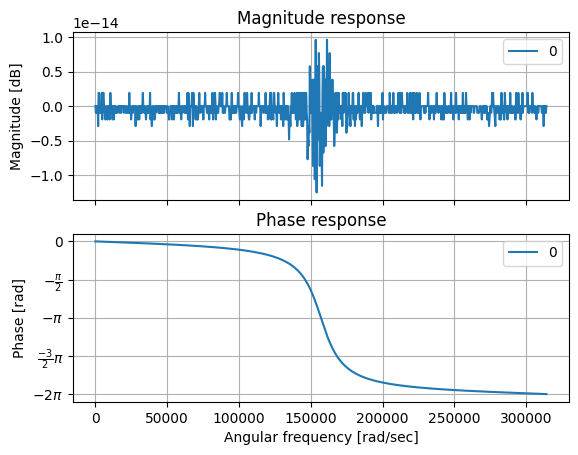

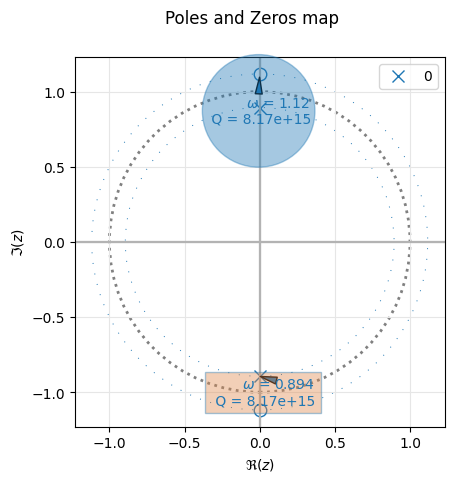

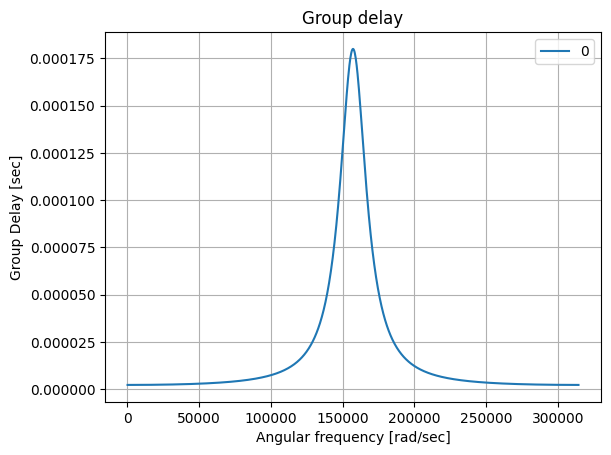

In [11]:
num = [0.8,0,1]
den = [1,0,0.8]

wrad, hh = sig.freqz(num, den, worN=1000)
ww = wrad/np.pi * (fs/2)

h = sig.TransferFunction(num, den, dt=1/fs)

analyze_sys(h)

## 2.b

$H(Z) = 1 + \frac{0.8+Z^{-4}}{1+0.8 Z^{-4}} = \frac{1.8\left(1+Z^{-4}\right)}{1+0.8 Z^{-4}}$

[[1,
  array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
         <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
        dtype=object)],
 [2, ()],
 [3, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>],
 [4,
  <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>]]

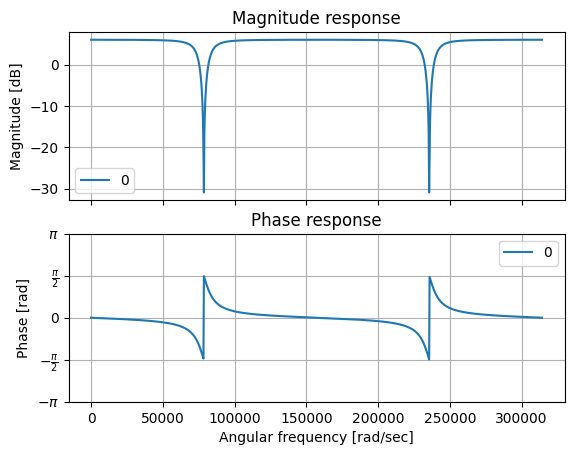

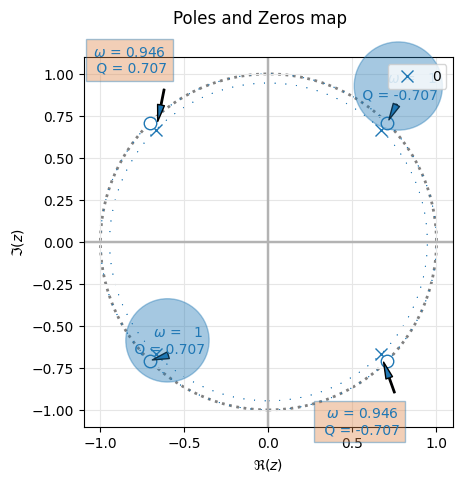

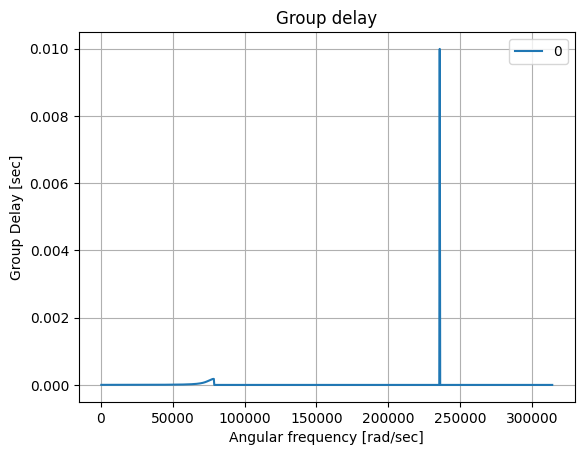

In [13]:
num = [1.8,0,0,0,1.8]
den = [1,0,0,0,0.8]

wrad, hh = sig.freqz(num, den, worN=1000)
ww = wrad/np.pi * (fs/2)

h = sig.TransferFunction(num, den, dt=1/fs)

analyze_sys(h)

Se observa que la transferencia es nula en los puntos equivalentes a $\pi/4$ y $3\pi/4$.

Si $\pi/4 \equiv 125 Hz$, entonces $2\pi = f_s \equiv 1kHz$